<a href="https://colab.research.google.com/github/CHINTALAVIVEK1/RNTBIC_Assignment1/blob/main/rntbci2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data cleaning

In [ ]:
import pandas as pd

# Load datasets
airports_df = pd.read_csv("airports.csv")
uscities_df = pd.read_excel("uscities.xlsx")  # Load from Excel instead of CSV

# Display first few rows
print("Airports Data Preview:")
print(airports_df.head())

print("\nUS Cities Population Data Preview:")
print(uscities_df.head())

# Clean datasets
airports_df = airports_df[['iata', 'name', 'city', 'state', 'country', 'latitude', 'longitude']].dropna()
uscities_df = uscities_df[['city', 'state_name', 'state_id', 'lat', 'lng', 'population', 'density']].dropna()

# Rename columns for better clarity
airports_df.rename(columns={'name': 'airport_name', 'city': 'airport_city', 'state': 'airport_state'}, inplace=True)
uscities_df.rename(columns={'city': 'city_name', 'state_name': 'state_full', 'state_id': 'state_code'}, inplace=True)

# Display cleaned data summary
print("\nCleaned Airports Data:")
print(airports_df.info())

print("\nCleaned US Cities Data:")
print(uscities_df.info())


Airports Data Preview:
  iata                  name              city state country   latitude  \
0  00M               Thigpen       Bay Springs    MS     USA  31.953765   
1  00R  Livingston Municipal        Livingston    TX     USA  30.685861   
2  00V           Meadow Lake  Colorado Springs    CO     USA  38.945749   
3  01G          Perry-Warsaw             Perry    NY     USA  42.741347   
4  01J      Hilliard Airpark          Hilliard    FL     USA  30.688012   

    longitude  
0  -89.234505  
1  -95.017928  
2 -104.569893  
3  -78.052081  
4  -81.905944  

US Cities Population Data Preview:
          city   city_ascii state_id  state_name  county_fips  county_name  \
0     New York     New York       NY    New York        36081       Queens   
1  Los Angeles  Los Angeles       CA  California         6037  Los Angeles   
2      Chicago      Chicago       IL    Illinois        17031         Cook   
3        Miami        Miami       FL     Florida        12086   Miami-Dade   
4   

#Analytical information



Number of Airports per State:
airport_state
AK    263
TX    209
CA    205
OK    102
OH    100
FL    100
GA     97
NY     97
MI     94
MN     89
IL     88
WI     84
KS     78
IA     78
MO     74
AR     74
NE     73
AL     73
NC     72
MS     72
MT     71
PA     71
TN     70
IN     65
WA     65
AZ     59
OR     57
SD     57
LA     55
SC     52
ND     52
NM     51
KY     50
CO     49
VA     47
ID     37
UT     35
NJ     35
ME     34
NV     32
WY     32
MA     30
WV     24
MD     18
HI     16
CT     15
NH     14
VT     13
PR     11
RI      6
VI      5
DE      5
CQ      4
AS      3
DC      1
GU      1
Name: count, dtype: int64


<ipython-input-12-20b7ab9e9bc2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airports_per_state.index[:10], y=airports_per_state.values[:10], palette='viridis')


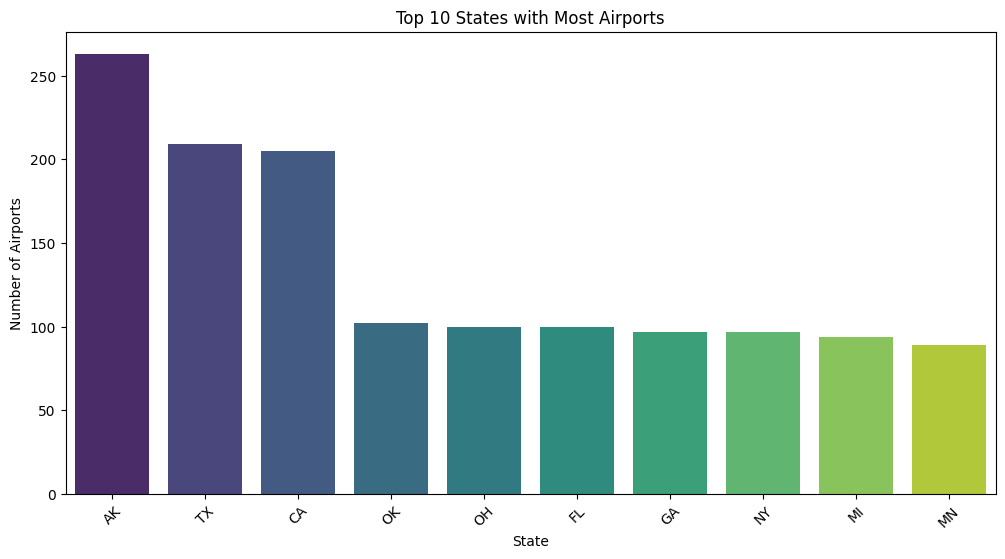

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analytical Insights
# 1. Number of Airports per State
airports_per_state = airports_df['airport_state'].value_counts()
print("\nNumber of Airports per State:")
print(airports_per_state)

plt.figure(figsize=(12,6))
sns.barplot(x=airports_per_state.index[:10], y=airports_per_state.values[:10], palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Number of Airports")
plt.title("Top 10 States with Most Airports")
plt.show()


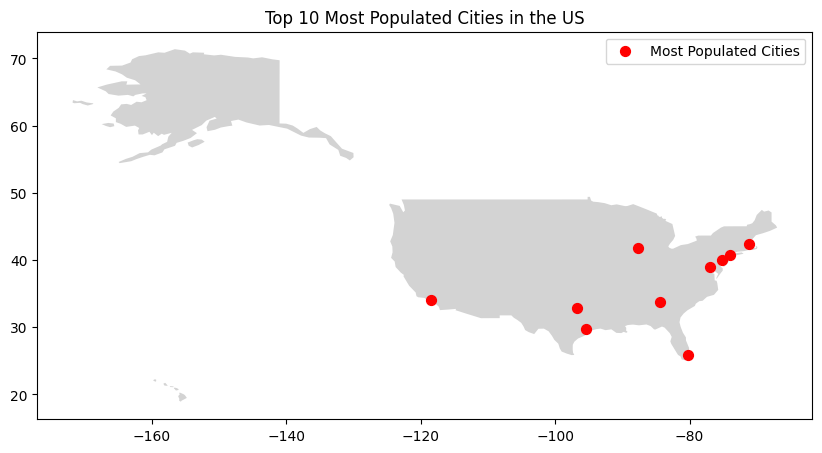

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the world map
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")

# Filter only the United States
usa = world[world['ADMIN'] == "United States of America"]

# Load city population data
uscities_df = pd.read_excel("uscities.xlsx")

# Get top 10 most populated cities
top_cities = uscities_df.nlargest(10, 'population')

# Create a GeoDataFrame for top cities
gdf_cities = gpd.GeoDataFrame(top_cities, geometry=gpd.points_from_xy(top_cities.lng, top_cities.lat))

# Plot the map
fig, ax = plt.subplots(figsize=(10, 6))
usa.plot(ax=ax, color="lightgray")  # Plot USA
gdf_cities.plot(ax=ax, color="red", markersize=50, label="Most Populated Cities")  # Plot cities
plt.title("Top 10 Most Populated Cities in the US")
plt.legend()
plt.show()


#Valid points

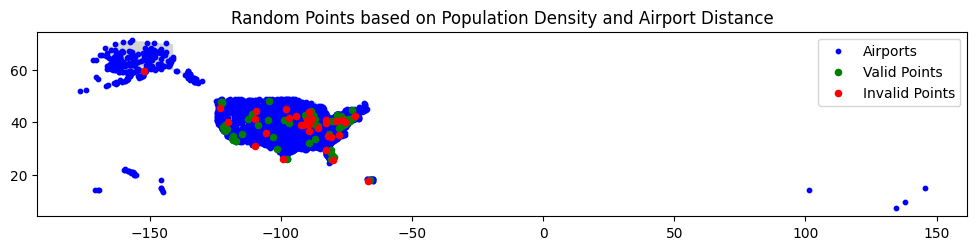

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Load the US map
us_map = gpd.read_file("/content/ne_110m_admin_0_countries.zip")
us_map = us_map[us_map['ADMIN'] == 'United States of America']

# Convert random points to GeoDataFrame
valid_gdf = gpd.GeoDataFrame(geometry=[Point(lon, lat) for lon, lat in zip(random_points_df[random_points_df['validity'] == 'Valid']['lng'], random_points_df[random_points_df['validity'] == 'Valid']['lat'])])
invalid_gdf = gpd.GeoDataFrame(geometry=[Point(lon, lat) for lon, lat in zip(random_points_df[random_points_df['validity'] == 'Invalid']['lng'], random_points_df[random_points_df['validity'] == 'Invalid']['lat'])])

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
us_map.plot(ax=ax, color="lightgray")
airports_gdf.plot(ax=ax, color="blue", markersize=10, label="Airports")
valid_gdf.plot(ax=ax, color="green", markersize=20, label="Valid Points")
invalid_gdf.plot(ax=ax, color="red", markersize=20, label="Invalid Points")

plt.legend()
plt.title("Random Points based on Population Density and Airport Distance")
plt.show()


#Top Cities to Operate


* Top Cities with Best Airline Potential

In [46]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
from tqdm import tqdm

# Load datasets
uscities_df = pd.read_csv("/content/uscities.csv")
airports_df = pd.read_csv("/content/airports.csv")

# Select relevant columns
uscities_df = uscities_df[['city', 'state_name', 'lat', 'lng', 'population']].dropna()
airports_df = airports_df[['iata', 'name', 'city', 'state', 'latitude', 'longitude']].dropna()

# Function to find nearest city & airport
def find_nearest(lat, lon, df, lat_col, lon_col, name_col):
    df['distance'] = df.apply(lambda row: geodesic((lat, lon), (row[lat_col], row[lon_col])).km, axis=1)
    nearest = df.loc[df['distance'].idxmin()]
    return nearest[name_col], nearest['distance']

# Add nearest city and airport info
nearest_cities = []
nearest_airports = []
nearest_airport_distances = []

for _, row in tqdm(random_points_df[random_points_df['validity'] == 'Valid'].iterrows(), total=len(random_points_df)):
    city, city_distance = find_nearest(row['lat'], row['lng'], uscities_df, 'lat', 'lng', 'city')
    airport, airport_distance = find_nearest(row['lat'], row['lng'], airports_df, 'latitude', 'longitude', 'name')

    nearest_cities.append(city)
    nearest_airports.append(airport)
    nearest_airport_distances.append(airport_distance)

# Assign values to DataFrame
random_points_df.loc[random_points_df['validity'] == 'Valid', 'Nearest City'] = nearest_cities
random_points_df.loc[random_points_df['validity'] == 'Valid', 'Nearest Airport'] = nearest_airports
random_points_df.loc[random_points_df['validity'] == 'Valid', 'Nearest Airport Distance'] = nearest_airport_distances

# Get top US states and cities for airline operations
top_states = random_points_df['state'].value_counts().head(10)
top_cities = random_points_df['Nearest City'].value_counts().head(10)

# Display results
print("\nTop US States for Airline Operations:")
print(top_states)

print("\nTop US Cities for Airline Operations:")
print(top_cities)

# Save results to CSV
random_points_df.to_csv("/content/random_points_analysis.csv", index=False)


 68%|██████▊   | 68/100 [07:12<03:23,  6.36s/it]


Top US States for Airline Operations:
state
California      11
Pennsylvania     8
New York         7
Florida          7
Illinois         6
Wisconsin        5
New Jersey       4
Wyoming          4
Texas            4
Washington       3
Name: count, dtype: int64

Top US Cities for Airline Operations:
Nearest City
nan                  32
Weston                2
Ormond-by-the-Sea     1
Hooper                1
Indianola             1
Benicia               1
Planada               1
Minor                 1
El Cajon              1
Auburn                1
Name: count, dtype: int64


*Visualization


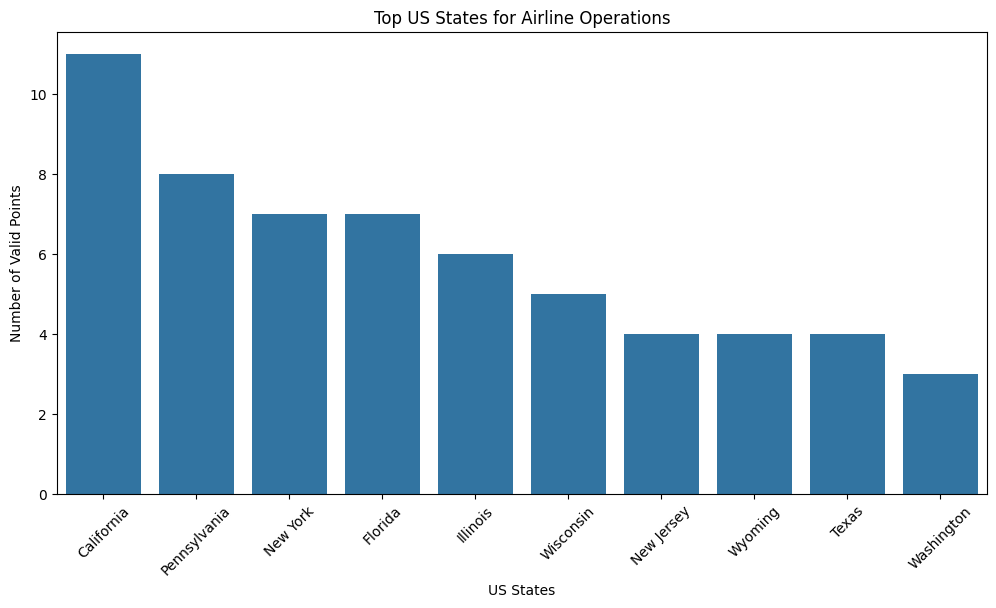

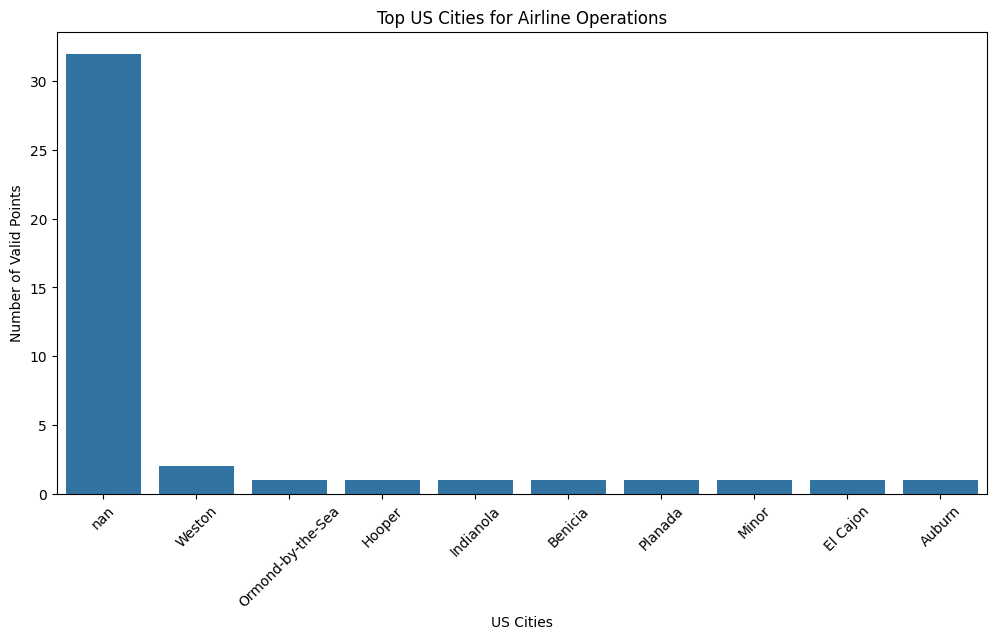

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot top US states for airline operations
plt.figure(figsize=(12, 6))
sns.barplot(x=top_states.index, y=top_states.values)
plt.xlabel("US States")
plt.ylabel("Number of Valid Points")
plt.title("Top US States for Airline Operations")
plt.xticks(rotation=45)
plt.show()

# Plot top US cities for airline operations
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.xlabel("US Cities")
plt.ylabel("Number of Valid Points")
plt.title("Top US Cities for Airline Operations")
plt.xticks(rotation=45)
plt.show()


In [65]:
import folium
import pandas as pd
from folium.plugins import MarkerCluster

# Load data
cities_df = pd.read_csv("uscities.csv")  # Assuming this contains population and location data for US cities

# Filter top cities based on population (you can adjust this filter)
top_cities_df = cities_df[cities_df['population'] > 1500000]  # Cities with population > 1.5M

# Initialize Map (Centered in the US)
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4, tiles="cartodb positron")

# Marker Cluster for Better Performance
marker_cluster = MarkerCluster().add_to(m)

# Add Top Cities (Red)
for _, row in top_cities_df.iterrows():
    folium.Marker(
        location=[row["lat"], row["lng"]],
        popup=f"City: {row['city']}, {row['state_id']}<br>Population: {row['population']}",
        icon=folium.Icon(color="red", icon="info-sign"),
    ).add_to(marker_cluster)

# Save Map as HTML
m.save("Top_US_Cities_Airline_Operations_Map.html")

# Show Confirmation
print("✅ Interactive Map for Top Cities Created! Open 'Top_US_Cities_Airline_Operations_Map.html'")


✅ Interactive Map for Top Cities Created! Open 'Top_US_Cities_Airline_Operations_Map.html'
